In [1]:
from PIL import Image, ImageDraw
import torch
import torchvision
from transformers import pipeline, DetrImageProcessor, DetrForObjectDetection

In [4]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Segmentation
* Instance 
* Panoptic
* Semantic

In [6]:
model_id='nvidia/segformer-b1-finetuned-cityscapes-1024-1024'
pipe=pipeline(task='image-segmentation', model=model_id, device=device)

model.safetensors:   0%|          | 0.00/54.8M [00:00<?, ?B/s]

In [7]:
img=Image.open('segm.jpg')

In [8]:
results=pipe(img)
results

[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

In [9]:
len(results)

10

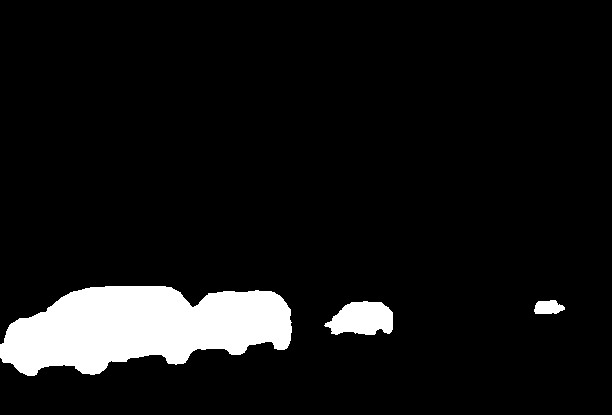

In [13]:
results[-1]['mask']

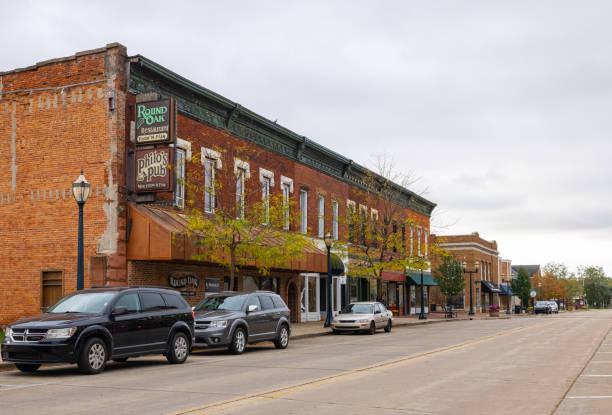

In [11]:
img

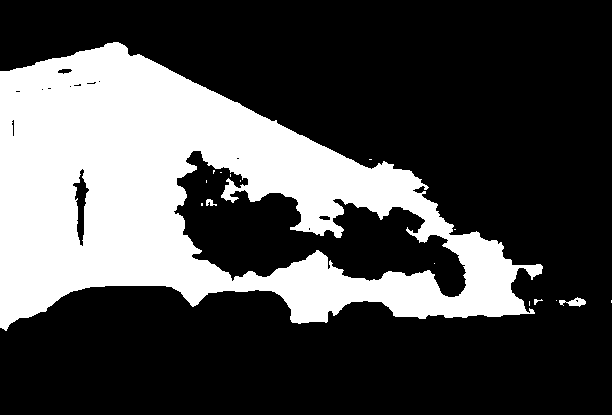

In [12]:
results[2]['mask']

In [15]:
model_id2='facebook/mask2former-swin-large-cityscapes-panoptic'
pipe_panoptic=pipeline(task='image-segmentation', model=model_id2, device=device)
results2=pipe_panoptic(img)
results2

/home/phong/miniconda3/envs/mlenv/lib/python3.12/site-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `Mask2FormerImageProcessor.__init__` and were ignored: '_max_size'
  return func(*args, **kwargs)
`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999981,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999958,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.99997,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999575,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999958,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999634,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.996092,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.999222,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': 0.99987,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

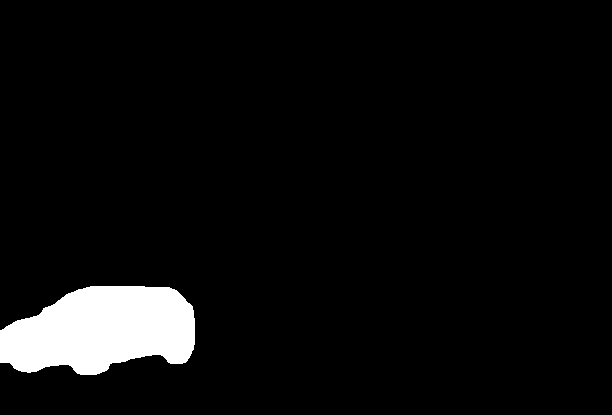

In [16]:
results2[0]['mask']

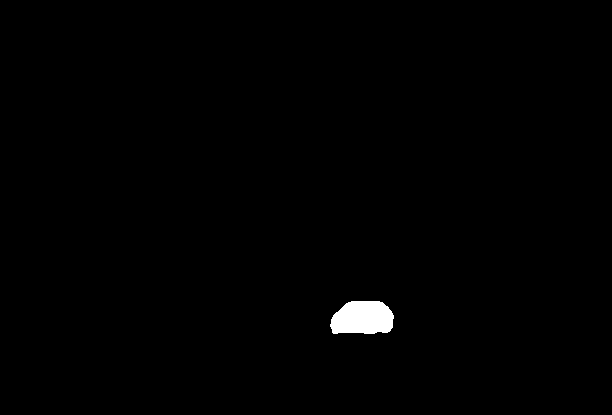

In [17]:
results2[-2]['mask']